In [1]:
import pymongo

In [2]:
import pprint #for pretty printing
import re

In [3]:
from pymongo import MongoClient

In [4]:
#Use MongoClient to connect to the already running mongod server

client = MongoClient('localhost', 27017)

In [5]:
#Database 'MongoExample' and dataset 'retail_for_viz' being selected
#Using the sample retail dataset for this example, but can replicate the same on the larger dataset

db = client['Hospital']
collection = db['Ratings']
doc_iterator = collection.find()

In [6]:
#Running some basic queries

doc_iterator.count()

C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  This is separate from the ipykernel package so we can avoid doing imports until


80053

In [7]:
for doc in collection.find().limit(2):
    pprint.pprint (doc)

{'10_pct': 33.6,
 '10_votes': 135,
 '1_pct': 49.0,
 '1_votes': 197,
 '2_pct': 1.7,
 '2_votes': 7,
 '3_pct': 1.7,
 '3_votes': 7,
 '4_pct': 0.7,
 '4_votes': 3,
 '5_pct': 1.7,
 '5_votes': 7,
 '6_pct': 1.7,
 '6_votes': 7,
 '7_pct': 2.7,
 '7_votes': 11,
 '8_pct': 2.0,
 '8_votes': 8,
 '9_pct': 5.0,
 '9_votes': 20,
 '_id': ObjectId('5bd64a05cd0d0e2a3f3d319b'),
 'average': 4.6,
 'category': 'Males',
 'link': 'http://www.imdb.com/title/tt6322922/ratings-male',
 'mean': 5.0,
 'median': 2,
 'respondents': 402,
 'timestamp': '2017-07-17 12:28:32.785639'}
{'10_pct': 62.8,
 '10_votes': 49,
 '1_pct': 20.5,
 '1_votes': 16,
 '2_pct': 1.3,
 '2_votes': 1,
 '3_pct': 0.0,
 '3_votes': 0,
 '4_pct': 1.3,
 '4_votes': 1,
 '5_pct': 1.3,
 '5_votes': 1,
 '6_pct': 0.0,
 '6_votes': 0,
 '7_pct': 3.8,
 '7_votes': 3,
 '8_pct': 5.1,
 '8_votes': 4,
 '9_pct': 3.8,
 '9_votes': 3,
 '_id': ObjectId('5bd64a05cd0d0e2a3f3d319c'),
 'average': 6.9,
 'category': 'Females',
 'link': 'http://www.imdb.com/title/tt6322922/ratings-fema

In [8]:
#Running some of the aggregation pipeline queries demonstrated earlier via Mongo shell

#Distribution on invoices/item transactions by country

pipe = [
    {"$group": {"_id":"$average", "num_transactions": {"$sum": 1}}}, 
    {'$sort': {'num_transactions': -1}},
    {'$limit': 10}
]
cursor = collection.aggregate(pipeline = pipe)
for doc in cursor:
    pprint.pprint(doc)

{'_id': 1.0, 'num_transactions': 4165}
{'_id': 6.3, 'num_transactions': 3787}
{'_id': 8.4, 'num_transactions': 3684}
{'_id': 5.3, 'num_transactions': 3494}
{'_id': 6.4, 'num_transactions': 3208}
{'_id': 4.3, 'num_transactions': 3008}
{'_id': 5.1, 'num_transactions': 2883}
{'_id': 6.2, 'num_transactions': 2773}
{'_id': 4.7, 'num_transactions': 2697}
{'_id': 5.2, 'num_transactions': 2677}


In [9]:
#Distribution of Quantity of items bought

pipe = [
    {"$match": {"7_votes": {"$gt":1}}}, 
    {"$group":{"_id":"$7_votes", "num_transactions":{"$sum":1}}},
    {"$sort":{"num_transactions":-1}},
    {"$limit":10}
]
cursor = collection.aggregate(pipeline = pipe)
for doc in cursor:
    pprint.pprint(doc)

{'_id': 5, 'num_transactions': 3617}
{'_id': 7, 'num_transactions': 2722}
{'_id': 8, 'num_transactions': 2529}
{'_id': 4, 'num_transactions': 2433}
{'_id': 11, 'num_transactions': 2366}
{'_id': 6, 'num_transactions': 2315}
{'_id': 14, 'num_transactions': 1707}
{'_id': 16, 'num_transactions': 1626}
{'_id': 3, 'num_transactions': 1526}
{'_id': 33, 'num_transactions': 1293}


In [10]:
#Minimum, Maximum and Average : Quantity and Unit Price, Minimum and Maximum : Invoice Date

pipe1 = [{"$match": {"5_pct": {"$gt":1}}}, {"$group": {"_id":None, "5_pct_min":{"$min":"$5_pct"}, "5_pct_max":{"$max":"$5_pct"}, "5_pct_mean": {"$avg":"$5_pct"}}}]
pipe2 = [{"$match": {"8_pct": {"$gt":0}}}, {"$group": {"_id":None, "8_pct_min":{"$min":"$8_pct"}, "8_pct_max":{"$max":"$8_pct"}, "8_pct_mean": {"$avg":"$8_pct"}}}]
pipe3 = [{"$group": {"_id":None, "9_votes_min":{"$min":"$9_votes"}, "9_votes_max":{"$max":"$9_votes"}}}]

cursor1 = collection.aggregate(pipeline = pipe1)
cursor2 = collection.aggregate(pipeline = pipe2)
cursor3 = collection.aggregate(pipeline = pipe3)


In [11]:
for doc in cursor1:
    pprint.pprint(doc)
    

{'5_pct_max': 25.0,
 '5_pct_mean': 4.434446944469445,
 '5_pct_min': 1.1,
 '_id': None}


In [12]:
for doc in cursor2:
    pprint.pprint(doc)

{'8_pct_max': 28.6,
 '8_pct_mean': 5.838737219512937,
 '8_pct_min': 1.0,
 '_id': None}


In [13]:
for doc in cursor3:
    pprint.pprint(doc)

{'9_votes_max': 146, '9_votes_min': 0, '_id': None}


In [14]:
#Map Reduce in PyMongo : Count of customers per country

from bson.code import Code
mapper = Code("""function(){emit (this.category, {Links: this.link});}""")

reducer = Code("""function(key,values){var sum = 0; values.forEach(function (doc){sum = sum + 1;}); return {Links: sum};}""")

In [15]:
result = collection.map_reduce(mapper, reducer, "myresults")
for doc in result.find():
    pprint.pprint (doc)

{'_id': 'Aged 18-29', 'value': {'Links': 4.0}}
{'_id': 'Aged 30-44', 'value': {'Links': 4.0}}
{'_id': 'Aged 45+', 'value': {'Links': 4.0}}
{'_id': 'Aged under 18', 'value': {'Links': 3.0}}
{'_id': 'Females', 'value': {'Links': 3.0}}
{'_id': 'Females Aged 18-29', 'value': {'Links': 4.0}}
{'_id': 'Females Aged 30-44', 'value': {'Links': 4.0}}
{'_id': 'Females Aged 45+', 'value': {'Links': 4.0}}
{'_id': 'Females under 18', 'value': {'Links': 4.0}}
{'_id': 'IMDb staff', 'value': {'Links': 4.0}}
{'_id': 'IMDb users', 'value': {'Links': 4.0}}
{'_id': 'Males', 'value': {'Links': 3.0}}
{'_id': 'Males Aged 18-29', 'value': {'Links': 4.0}}
{'_id': 'Males Aged 30-44', 'value': {'Links': 4.0}}
{'_id': 'Males Aged 45+', 'value': {'Links': 4.0}}
{'_id': 'Males under 18', 'value': {'Links': 3.0}}
{'_id': 'Non-US users', 'value': {'Links': 4.0}}
{'_id': 'Top 1000 voters', 'value': {'Links': 4.0}}
{'_id': 'US users', 'value': {'Links': 4.0}}


# Movie rating prediction using same data and machine learning

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io.json import json_normalize

In [17]:
df = pd.read_csv("ratings.csv")

In [18]:
df.describe()

,respondents,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
count,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,...,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000,80053.000000
mean,403.390804,5.331478,5.676954,6.023047,159.455074,11.562103,6.996590,3.211722,7.797684,13.441620,...,37.344919,2.230901,1.726936,1.031519,3.169689,3.504594,4.780199,4.800859,5.978127,35.431905
std,544.977400,1.673279,1.602680,3.131885,227.154951,16.120869,8.964425,4.267118,10.633648,19.326537,...,20.080097,2.444295,1.620233,1.438929,3.903391,4.137329,3.798714,5.224808,5.759520,15.814088
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,4.300000,4.800000,3.000000,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,25.000000,0.000000,0.000000,0.000000,0.800000,1.200000,2.200000,2.600000,3.600000,26.300000
50%,244.000000,5.300000,5.500000,6.000000,81.000000,3.000000,4.000000,2.000000,4.000000,6.000000,...,38.600000,2.000000,1.500000,0.600000,1.700000,2.900000,4.200000,4.300000,5.300000,35.500000
75%,518.000000,6.500000,6.600000,9.000000,227.000000,20.000000,10.000000,5.000000,10.000000,19.000000,...,46.000000,3.200000,2.200000,1.400000,3.600000,4.300000,6.800000,5.300000,6.400000,45.100000
max,2662.000000,8.500000,8.600000,10.000000,1021.000000,69.000000,40.000000,25.000000,55.000000,110.000000,...,100.000000,10.300000,9.100000,8.600000,25.000000,50.000000,25.000000,28.600000,33.300000,82.800000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80053 entries, 0 to 80052
Data columns (total 27 columns):
timestamp      80053 non-null object
respondents    80053 non-null int64
category       80053 non-null object
link           80053 non-null object
average        80053 non-null float64
mean           80053 non-null float64
median         80053 non-null int64
1_votes        80053 non-null int64
2_votes        80053 non-null int64
3_votes        80053 non-null int64
4_votes        80053 non-null int64
5_votes        80053 non-null int64
6_votes        80053 non-null int64
7_votes        80053 non-null int64
8_votes        80053 non-null int64
9_votes        80053 non-null int64
10_votes       80053 non-null int64
1_pct          80053 non-null float64
2_pct          80053 non-null float64
3_pct          80053 non-null float64
4_pct          80053 non-null float64
5_pct          80053 non-null float64
6_pct          80053 non-null float64
7_pct          80053 non-null float64
8_pct 

In [20]:
df.shape

(80053, 27)

In [21]:
df.head(3)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0


In [22]:
rating = 'average'
unused_cols = ['timestamp','link']

df = df.drop(unused_cols, axis=1)
#df.drop(['link'], axis=1)


In [23]:
Y = pd.DataFrame(df[rating])
df = df.drop([rating], axis=1)

In [24]:
#missing value : 0 => replace by mean

categorical_cols = ['category']
df_new = pd.get_dummies(df, columns=categorical_cols)
df_new.head(10)

,respondents,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,...,category_IMDb staff,category_IMDb users,category_Males,category_Males Aged 18-29,category_Males Aged 30-44,category_Males Aged 45+,category_Males under 18,category_Non-US users,category_Top 1000 voters,category_US users
0,402,5.0,2,197,7,7,3,7,7,11,...,0,0,1,0,0,0,0,0,0,0
1,78,7.7,10,16,1,0,1,1,0,3,...,0,0,0,0,0,0,0,0,0,0
2,4,4.2,3,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4.2,3,2,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,130,6.5,9,41,0,3,1,2,3,6,...,0,0,0,0,0,0,0,0,0,0
5,108,6.2,9,37,0,3,1,1,3,6,...,0,0,0,1,0,0,0,0,0,0
6,17,8.4,10,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,196,5.0,2,92,7,3,1,6,4,4,...,0,0,0,0,0,0,0,0,0,0
8,164,4.5,1,85,6,3,1,5,3,4,...,0,0,0,0,1,0,0,0,0,0
9,25,8.2,10,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:

cols = list(df_new)

In [26]:
for i in cols:
    df_new[i]=df_new[i].replace(0,df_new[i].mean())

In [27]:
df_new.head(10)

,respondents,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,...,category_IMDb staff,category_IMDb users,category_Males,category_Males Aged 18-29,category_Males Aged 30-44,category_Males Aged 45+,category_Males under 18,category_Non-US users,category_Top 1000 voters,category_US users
0,402,5.0,2,197.0,7.000000,7.00000,3.000000,7.000000,7.00000,11.000000,...,0.052665,0.052665,1.000000,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665
1,78,7.7,10,16.0,1.000000,6.99659,1.000000,1.000000,13.44162,3.000000,...,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665
2,4,4.2,3,2.0,11.562103,6.99659,3.211722,1.000000,13.44162,18.832449,...,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665
3,4,4.2,3,2.0,11.562103,6.99659,3.211722,1.000000,13.44162,18.832449,...,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,1.000000,0.052665,0.052665,0.052665
4,130,6.5,9,41.0,11.562103,3.00000,1.000000,2.000000,3.00000,6.000000,...,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665
5,108,6.2,9,37.0,11.562103,3.00000,1.000000,1.000000,3.00000,6.000000,...,0.052665,0.052665,0.052665,1.000000,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665
6,17,8.4,10,2.0,11.562103,6.99659,3.211722,1.000000,13.44162,18.832449,...,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665
7,196,5.0,2,92.0,7.000000,3.00000,1.000000,6.000000,4.00000,4.000000,...,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665
8,164,4.5,1,85.0,6.000000,3.00000,1.000000,5.000000,3.00000,4.000000,...,0.052665,0.052665,0.052665,0.052665,1.000000,0.052665,0.052665,0.052665,0.052665,0.052665
9,25,8.2,10,5.0,11.562103,6.99659,3.211722,7.797684,13.44162,18.832449,...,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665,0.052665


In [28]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
import pylab as pl
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

C:\Users\mathu\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


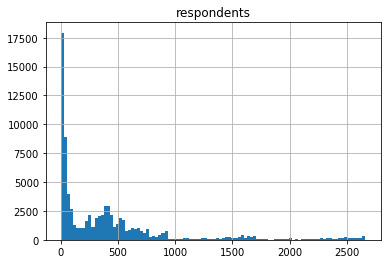

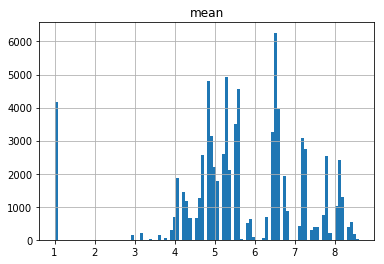

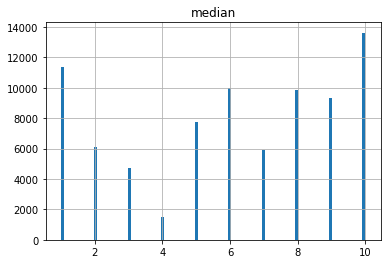

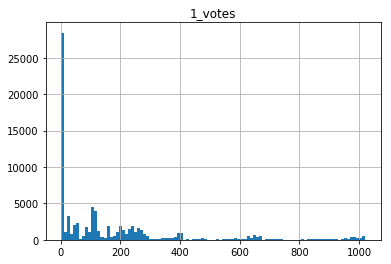

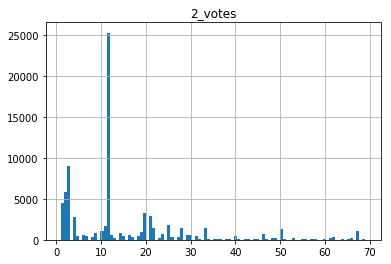

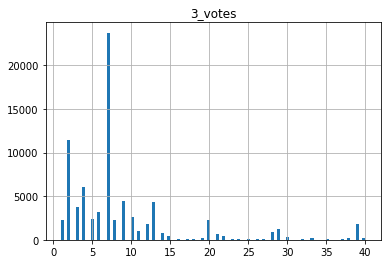

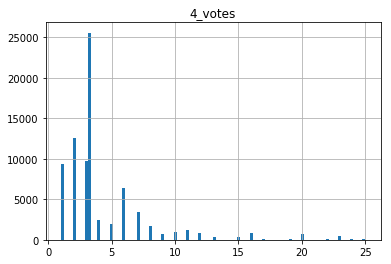

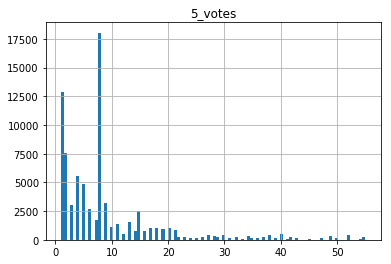

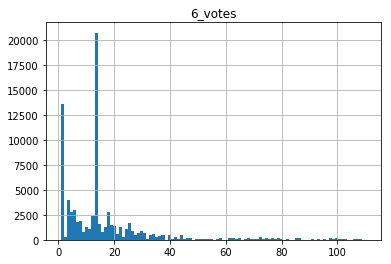

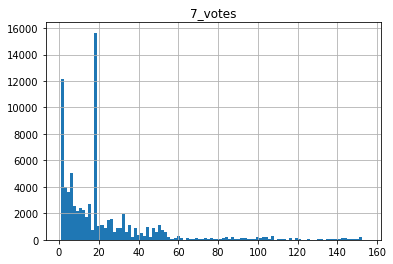

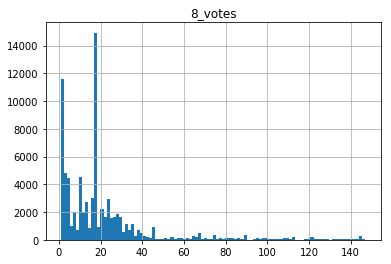

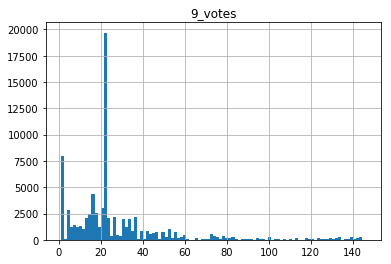

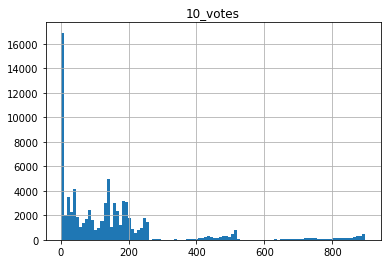

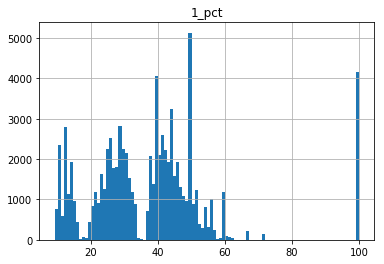

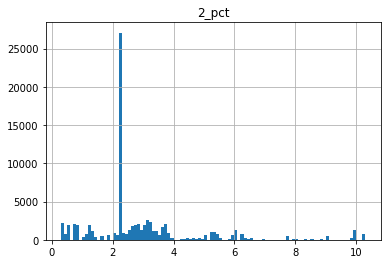

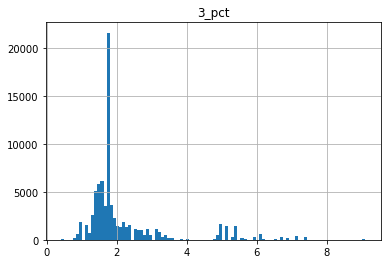

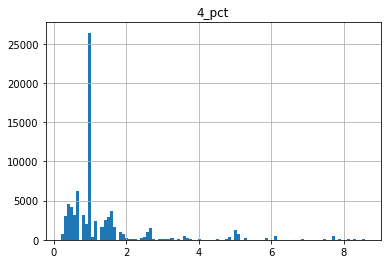

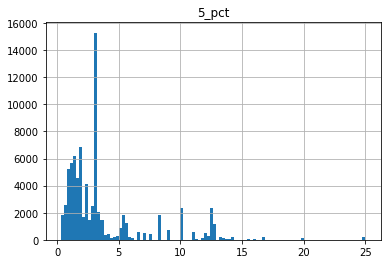

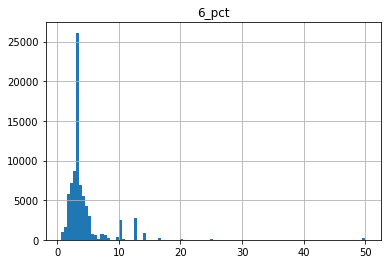

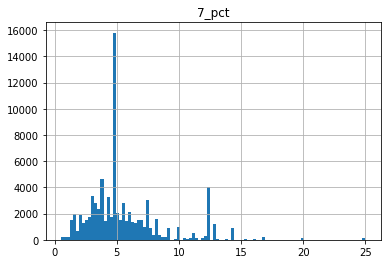

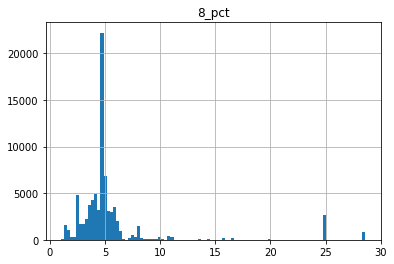

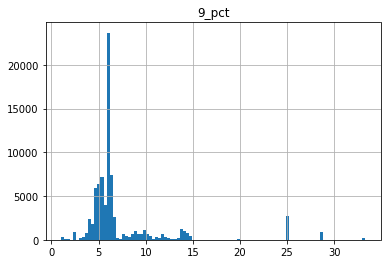

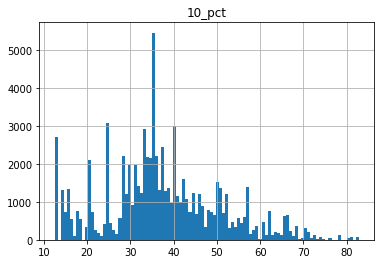

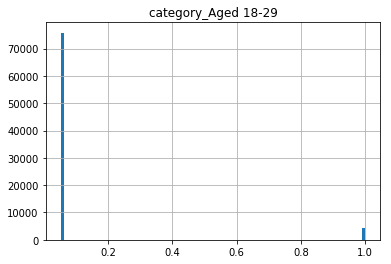

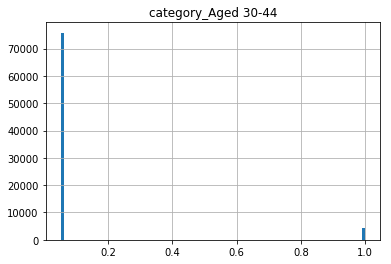

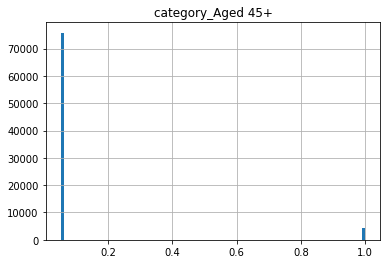

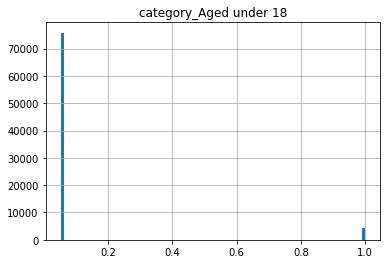

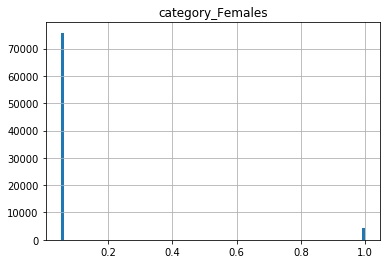

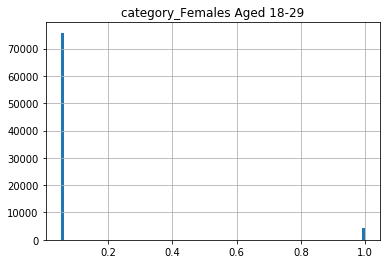

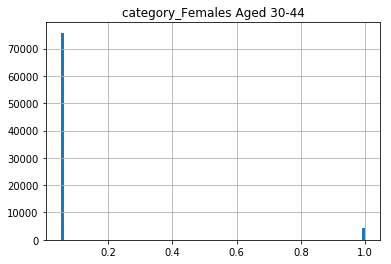

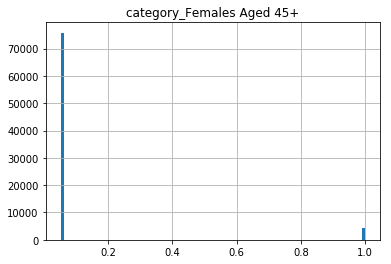

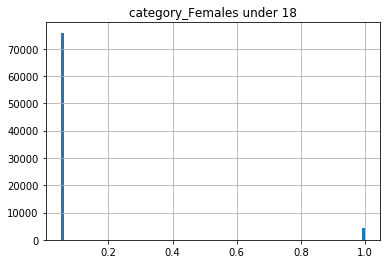

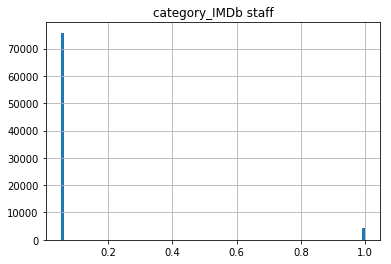

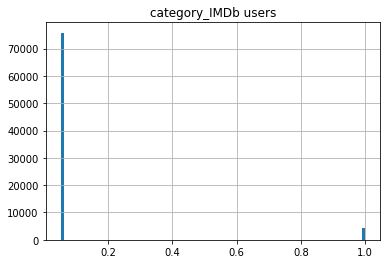

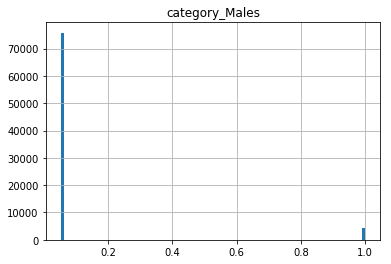

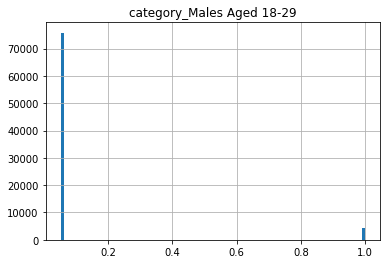

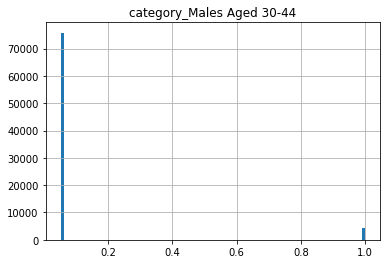

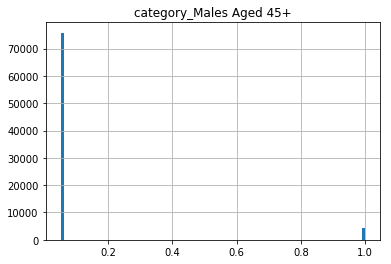

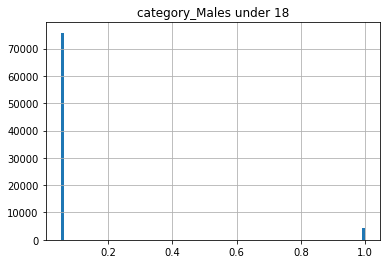

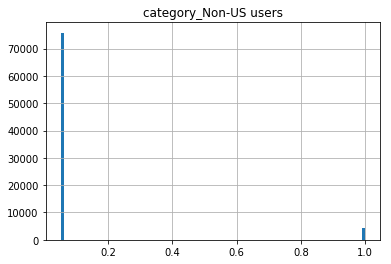

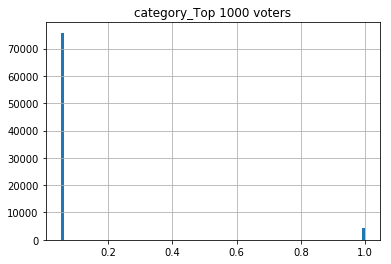

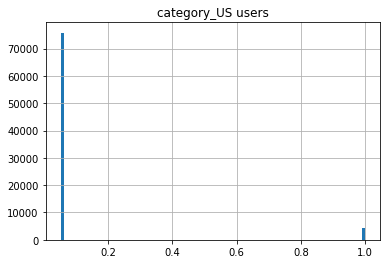

In [29]:
for i in cols:
    df_new.hist(column = i, bins =100)

In [30]:
#Dividing into train and test datasets
X = df_new
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [31]:
X_train.shape

(53635, 42)

In [32]:
y_train.shape

(53635, 1)

In [33]:
X_test.shape

(26418, 42)

In [34]:
y_test.shape

(26418, 1)

In [35]:
from sklearn import preprocessing

#Keeping the scaling parameters from the training dataset to be later applied to the test dataset
train_scaler = preprocessing.StandardScaler().fit(X_train)
train_scaler

x_trains = pd.DataFrame(data = train_scaler.transform(X_train))
x_trains.shape
x_trains.describe()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
count,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,...,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04,5.363500e+04
mean,-4.059605e-17,8.472336e-16,1.103822e-15,9.983831e-17,4.392476e-16,-2.573271e-16,-7.582222e-16,-2.777058e-17,-3.503842e-16,2.835390e-16,...,8.713496e-18,2.671313e-15,-4.686721e-16,6.272776e-16,-1.889675e-15,3.424252e-16,-1.164606e-15,-1.011486e-17,2.286814e-15,-6.108860e-15
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,...,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-7.376955e-01,-2.922279e+00,-1.601853e+00,-7.130969e-01,-9.953174e-01,-9.891065e-01,-8.694961e-01,-8.255503e-01,-8.691022e-01,-8.279263e-01,...,-2.388631e-01,-2.368066e-01,-2.349126e-01,-2.394295e-01,-2.350010e-01,-2.360592e-01,-2.368505e-01,-2.369382e-01,-2.335841e-01,-2.364551e-01
25%,-6.790952e-01,-5.494959e-01,-9.636083e-01,-6.866083e-01,-7.857257e-01,-6.136957e-01,-6.016478e-01,-7.255624e-01,-6.464170e-01,-6.317135e-01,...,-2.388631e-01,-2.368066e-01,-2.349126e-01,-2.394295e-01,-2.350010e-01,-2.360592e-01,-2.368505e-01,-2.369382e-01,-2.335841e-01,-2.364551e-01
50%,-2.890372e-01,-1.124043e-01,-6.241433e-03,-3.201818e-01,-2.574075e-01,-2.387117e-01,-2.770901e-01,-1.458642e-01,-1.764612e-01,-1.608028e-01,...,-2.388631e-01,-2.368066e-01,-2.349126e-01,-2.394295e-01,-2.350010e-01,-2.360592e-01,-2.368505e-01,-2.369382e-01,-2.335841e-01,-2.364551e-01
75%,2.090650e-01,5.744539e-01,9.511254e-01,2.846426e-01,3.320971e-01,1.371257e-01,2.018970e-01,7.434070e-02,1.329809e-01,1.531377e-01,...,-2.388631e-01,-2.368066e-01,-2.349126e-01,-2.394295e-01,-2.350010e-01,-2.360592e-01,-2.368505e-01,-2.369382e-01,-2.335841e-01,-2.364551e-01
max,4.135283e+00,1.823287e+00,1.270248e+00,3.789975e+00,3.755429e+00,3.891233e+00,5.558862e+00,4.573796e+00,5.199068e+00,5.176186e+00,...,4.186499e+00,4.222856e+00,4.256902e+00,4.176595e+00,4.255301e+00,4.236225e+00,4.222073e+00,4.220509e+00,4.281113e+00,4.229133e+00


In [36]:
x_trains.head(10)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.607676,0.636896,0.951125,-0.624801,-0.925453,-0.238712,-0.277090,-0.145864,-0.176461,-0.631714,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
1,-0.732202,-0.924146,-0.963608,-0.708682,-0.257408,-0.238712,-0.277090,-0.825550,-0.176461,-0.128135,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,4.222073,-0.236938,-0.233584,-0.236455
2,-0.724877,0.949104,0.632003,-0.713097,-0.257408,-0.238712,-0.277090,-0.145864,-0.869102,-0.827926,...,4.186499,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
3,0.895787,-0.424613,-0.963608,1.030740,1.240328,1.388495,0.737593,-0.025647,0.578351,1.055717,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,4.229133
4,-0.735864,-2.922279,-1.601853,-0.708682,-0.257408,-0.238712,-0.277090,-0.145864,-0.176461,-0.128135,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
5,0.033264,-0.861704,-1.282731,0.205177,0.681417,0.512536,-0.333800,-0.325611,0.077310,-0.239288,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,4.236225,-0.236850,-0.236938,-0.233584,-0.236455
6,0.005795,-0.924146,-1.282731,0.178688,0.681417,0.512536,-0.601648,-0.325611,0.077310,-0.278530,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,4.236225,-0.236850,-0.236938,-0.233584,-0.236455
7,3.217822,-0.174846,-0.006241,3.291106,2.986926,3.015275,3.148228,1.774135,2.248490,2.193751,...,-0.238863,4.222856,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
8,-0.050974,0.449571,0.632003,-0.223057,-0.855590,-0.613696,0.469745,0.374304,-0.089704,0.153138,...,-0.238863,-0.236807,-0.234913,4.176595,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
9,-0.179162,-1.111471,-1.601853,0.041830,0.262233,0.011989,-0.277090,-0.725562,-0.535074,-0.631714,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,4.236225,-0.236850,-0.236938,-0.233584,-0.236455


In [37]:
x_tests = pd.DataFrame(data = train_scaler.transform(X_test))
x_tests.shape

x_tests.describe()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
count,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000,...,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000,26418.000000
mean,-0.002467,-0.005792,0.003374,-0.004670,-0.006449,-0.006405,-0.007694,-0.001730,-0.002705,-0.004889,...,-0.017578,-0.005872,0.004998,-0.020785,0.004489,-0.001594,-0.006123,-0.006625,0.012675,-0.003862
std,0.993908,1.002230,0.998342,0.995565,0.995580,0.992779,0.991988,0.994038,0.993042,0.994694,...,0.964538,0.988228,1.010007,0.958003,1.008992,0.996825,0.987723,0.986713,1.025272,0.992272
min,-0.737695,-2.922279,-1.601853,-0.713097,-0.995317,-0.989106,-0.869496,-0.825550,-0.869102,-0.827926,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
25%,-0.675433,-0.549496,-0.963608,-0.686608,-0.785726,-0.613696,-0.601648,-0.725562,-0.646417,-0.670956,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
50%,-0.294531,-0.112404,-0.006241,-0.324597,-0.257408,-0.238712,-0.277090,-0.145864,-0.176461,-0.160803,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
75%,0.210896,0.574454,0.951125,0.284643,0.332097,0.137126,0.201897,0.074341,0.132981,0.153138,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
max,4.135283,1.823287,1.270248,3.789975,3.755429,3.891233,5.558862,4.573796,5.199068,5.176186,...,4.186499,4.222856,4.256902,4.176595,4.255301,4.236225,4.222073,4.220509,4.281113,4.229133


In [38]:
x_tests.head(10)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-0.047311,-0.924146,-1.601853,0.143370,0.471825,0.512536,-0.869496,-0.325611,-0.201047,-0.357016,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,4.236225,-0.236850,-0.236938,-0.233584,-0.236455
1,0.031433,-0.861704,-1.282731,0.205177,0.681417,0.512536,-0.333800,-0.325611,0.077310,-0.239288,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,4.236225,-0.236850,-0.236938,-0.233584,-0.236455
2,0.168777,-0.299729,-0.325364,0.253739,0.192369,-0.238285,-0.601648,0.074341,-0.368061,-0.121560,...,-0.238863,-0.236807,-0.234913,-0.239429,4.255301,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
3,-0.464838,0.512012,0.951125,-0.514432,-0.995317,-0.863970,-0.601648,-0.725562,-0.590746,-0.592471,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
4,0.516716,-0.237288,-0.325364,0.651069,-0.087086,-0.238285,0.201897,-0.025647,-0.312389,-0.082318,...,-0.238863,4.222856,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
5,-0.669939,1.323754,1.270248,-0.699853,-0.257408,-0.863970,-0.869496,-0.725562,-0.813431,-0.827926,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
6,-0.735864,-2.922279,-1.601853,-0.708682,-0.257408,-0.238712,-0.277090,-0.145864,-0.176461,-0.128135,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
7,0.082708,-0.736821,-1.282731,0.262569,0.611553,0.387400,-0.869496,-0.425599,-0.479403,-0.317773,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
8,-0.713889,-0.362171,-0.963608,-0.686608,-0.257408,-0.238712,-0.277090,-0.825550,-0.176461,-0.128135,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,-0.236850,-0.236938,-0.233584,-0.236455
9,-0.721214,-0.049963,-0.006241,-0.699853,-0.257408,-0.238712,-0.277090,-0.825550,-0.176461,-0.827926,...,-0.238863,-0.236807,-0.234913,-0.239429,-0.235001,-0.236059,4.222073,-0.236938,-0.233584,-0.236455


## Linear Regression

In [39]:
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)
lin_preds = linmodel.predict(X_test)
print(lin_preds)

[[3.78763555]
 [4.03650298]
 [5.13011003]
 ...
 [5.46652416]
 [4.47173046]
 [6.11966817]]


In [40]:
print ("Mean Squared Error:",metrics.mean_squared_error(y_test,lin_preds))
print ("R2 Score:",metrics.r2_score(y_test,lin_preds))
print ("Accuracy:",metrics.accuracy_score(np.round(y_test),np.round(lin_preds)))

Mean Squared Error: 0.014931806034791
R2 Score: 0.9946458589337228
Accuracy: 0.9031720796426679


## k-Nearest Neighbour

In [41]:
knnmod = KNeighborsRegressor(n_neighbors = 12, algorithm = 'ball_tree', leaf_size=1000, metric='manhattan',p=3,n_jobs=-1)
knnmod.fit(X_train, y_train)
knn_preds = knnmod.predict(X_test)
print(knn_preds)

[[3.8]
 [4. ]
 [5.1]
 ...
 [5.5]
 [4.5]
 [6.1]]


In [42]:
print ("Mean Squared Error:",metrics.mean_squared_error(y_test,knn_preds))
print ("R2 Score:",metrics.r2_score(y_test,knn_preds))
print ("Accuracy:",metrics.accuracy_score(np.round(y_test),np.round(knn_preds)))

Mean Squared Error: 0.00034437536275771613
R2 Score: 0.9998765163257775
Accuracy: 0.9965932318873495


## Random Forest

In [43]:
rdforest = RandomForestRegressor(max_features= 'log2' ,n_estimators=6,criterion='mse',min_samples_leaf=2, 
                                  oob_score=True, n_jobs=-1, random_state=0)
rdforest.fit(X_train, y_train)
rdpreds = rdforest.predict(X_test)
print(rdpreds)

C:\Users\mathu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[3.8 4.  5.1 ... 5.5 4.5 6.1]


In [44]:
print ("Mean Squared Error:",metrics.mean_squared_error(y_test,rdpreds))
print ("R2 Score:",metrics.r2_score(y_test,rdpreds))
print ("Accuracy:",metrics.accuracy_score(np.round(y_test),np.round(rdpreds)))

Mean Squared Error: 0.00012487020540855268
R2 Score: 0.9999552249277031
Accuracy: 0.9982209099856159


### Neural Network (Multi-Layer Perceptron)

In [45]:
clfmlp = MLPRegressor(activation='tanh', alpha=0.00001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
clfmlp.fit(X_train, y_train)
mlp_preds = clfmlp.predict(X_test)
print(mlp_preds)

C:\Users\mathu\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3.92142092 4.02231282 5.08459895 ... 5.40061239 4.63749135 6.22216325]


In [46]:
print ("Mean Squared Error:",metrics.mean_squared_error(y_test,rdpreds))
print ("R2 Score:",metrics.r2_score(y_test,rdpreds))
print ("Accuracy:",metrics.accuracy_score(np.round(y_test),np.round(rdpreds)))

Mean Squared Error: 0.00012487020540855268
R2 Score: 0.9999552249277031
Accuracy: 0.9982209099856159


#### We see that most of the models return accuracies in the range 90-99.8% and mean squared errors or around 0.1%. The neural network was the best out of since a neural network is a universal function approximator. 